# Model 47
## Feature Importance for model with fc meta features
*NOTE* - I need to start saving the feature importance of meta features. Otherwise the meta features hold all the importance in the final model and we can't learn much.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
fi = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}'):
        if 'fi' in f and 'M047' in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/{f}')
            fi = pd.concat([fi, df])

M047_0714_2226_1JHC_fi_0.4504MAE_-0.7977LMAE_catboost_3folds_500000iter_0.1lr.parquet
M047_0714_2226_1JHN_fi_0.3276MAE_-1.116LMAE_catboost_3folds_500000iter_0.1lr.parquet
M047_0714_2226_2JHC_fi_0.1737MAE_-1.75LMAE_catboost_3folds_500000iter_0.1lr.parquet
M047_0714_2226_2JHN_fi_0.1200MAE_-2.12LMAE_catboost_3folds_500000iter_0.1lr.parquet
M047_0714_2226_2JHH_fi_0.1098MAE_-2.209LMAE_catboost_3folds_500000iter_0.1lr.parquet
M047_0714_2226_3JHC_fi_0.1995MAE_-1.612LMAE_catboost_3folds_500000iter_0.1lr.parquet
M047_0714_2226_3JHH_fi_0.1225MAE_-2.1LMAE_catboost_3folds_500000iter_0.1lr.parquet


In [3]:
use_feats = pd.DataFrame()
for i, d in fi.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats[i] = d2['importance'] > 0.001

1JHC
1JHN
2JHC
2JHH
2JHN
3JHC
3JHH


In [6]:
# use_feats.to_csv('../fi/Good_Features_By_Type.csv')

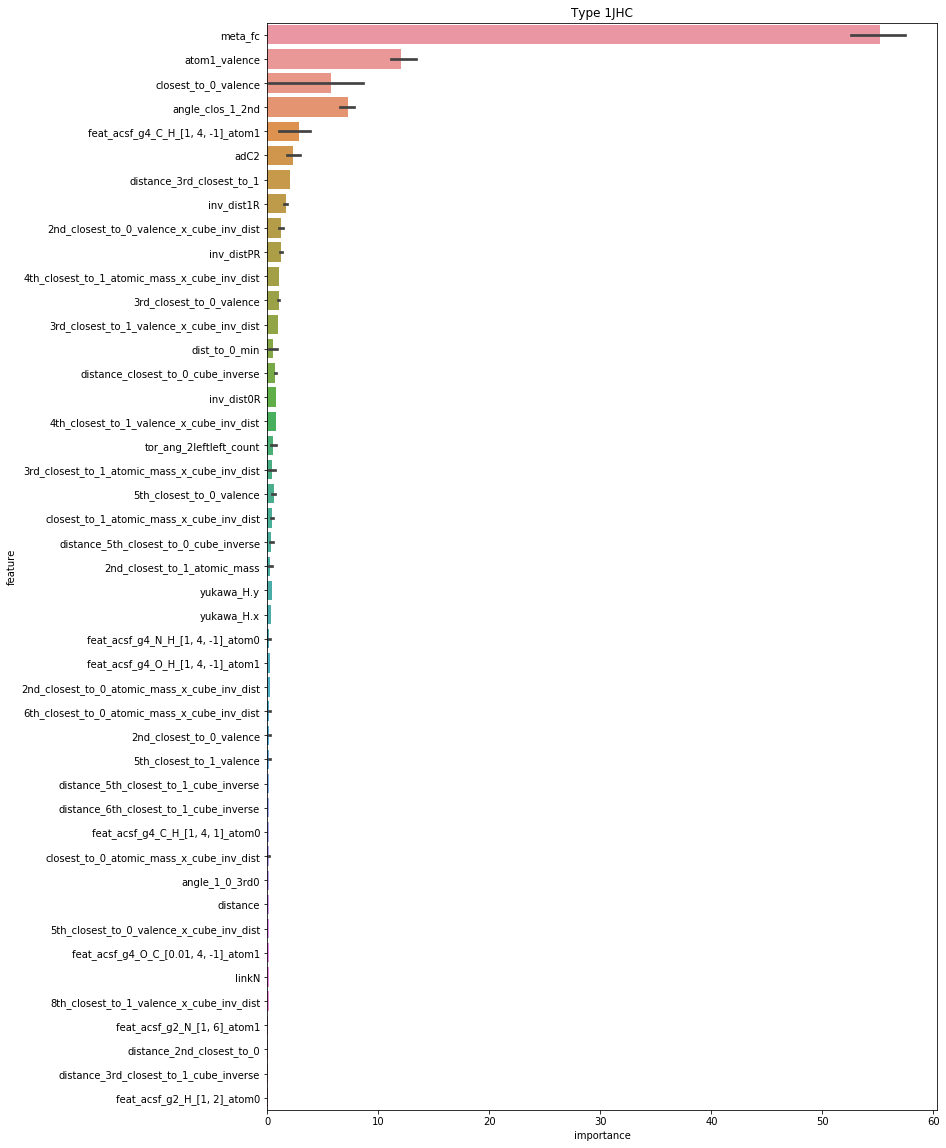

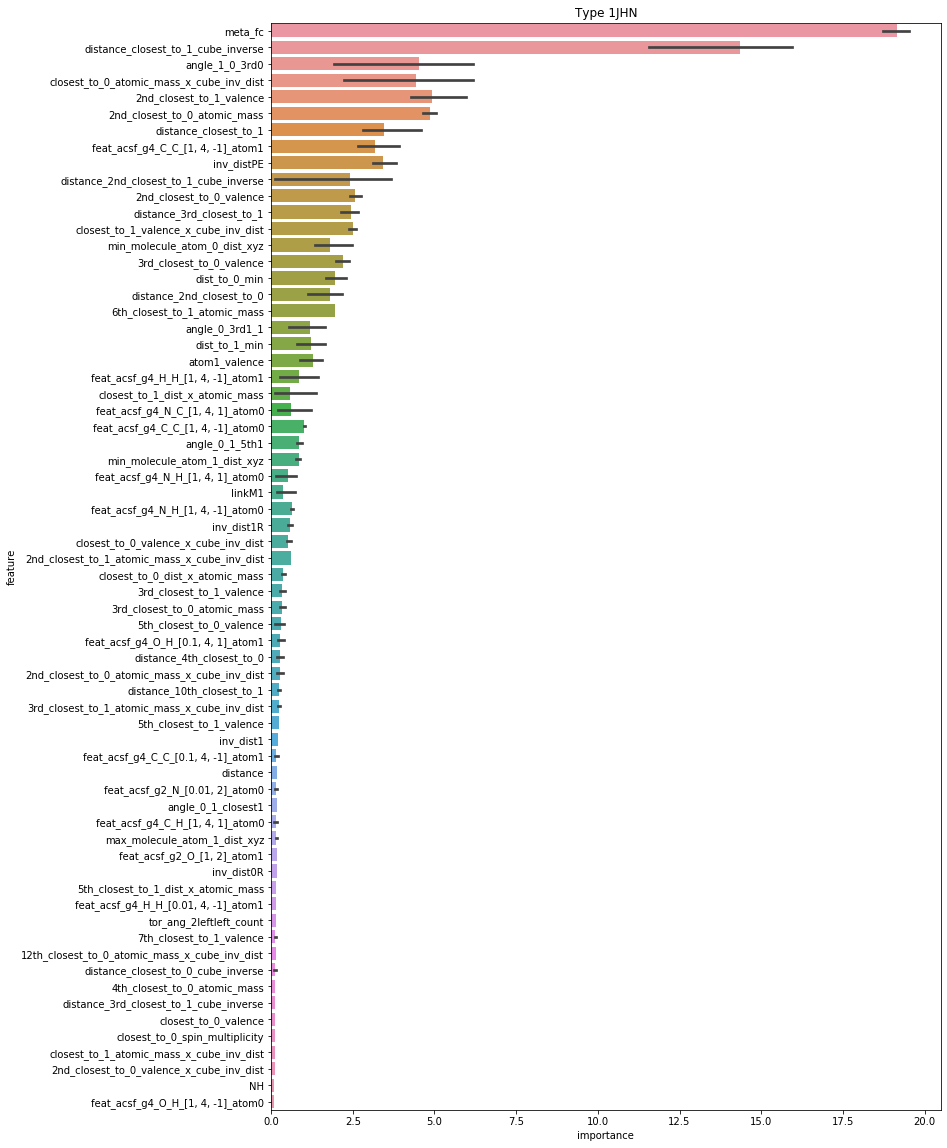

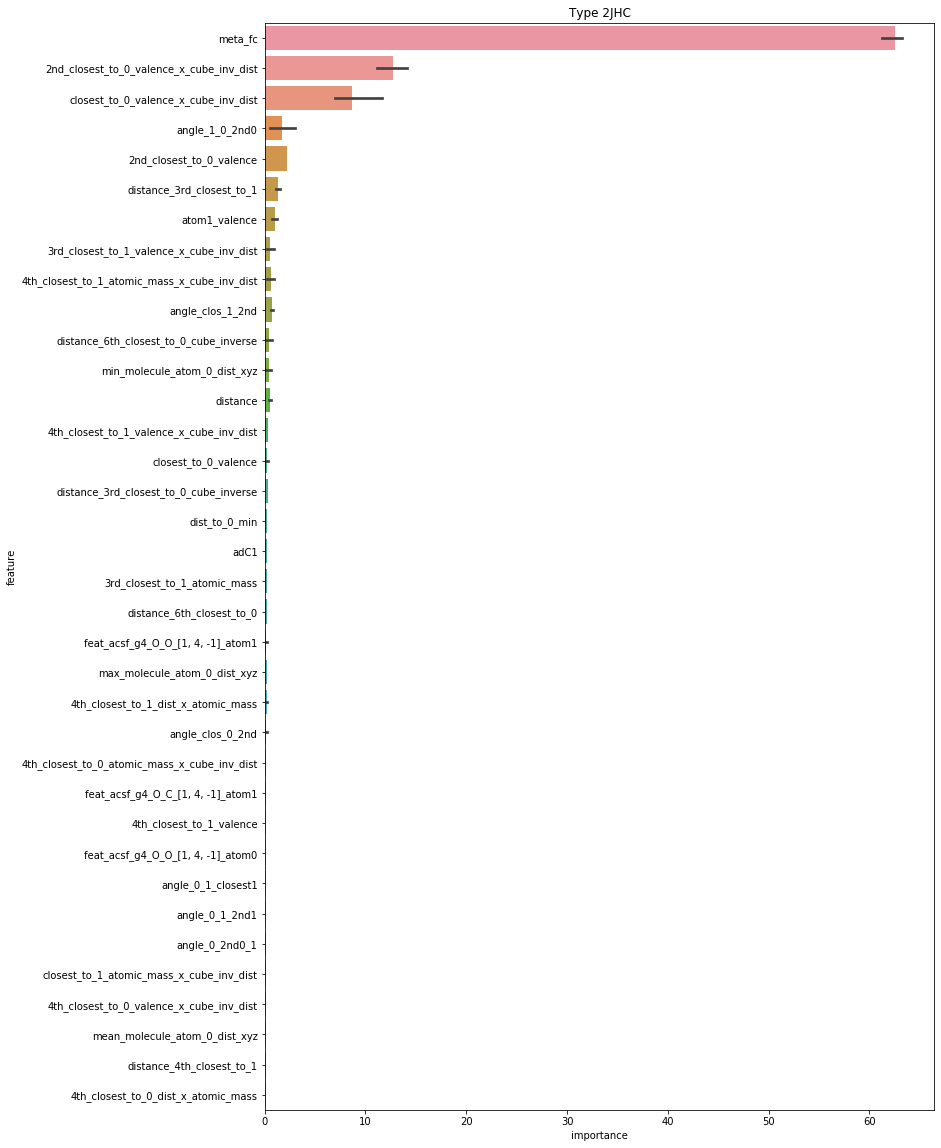

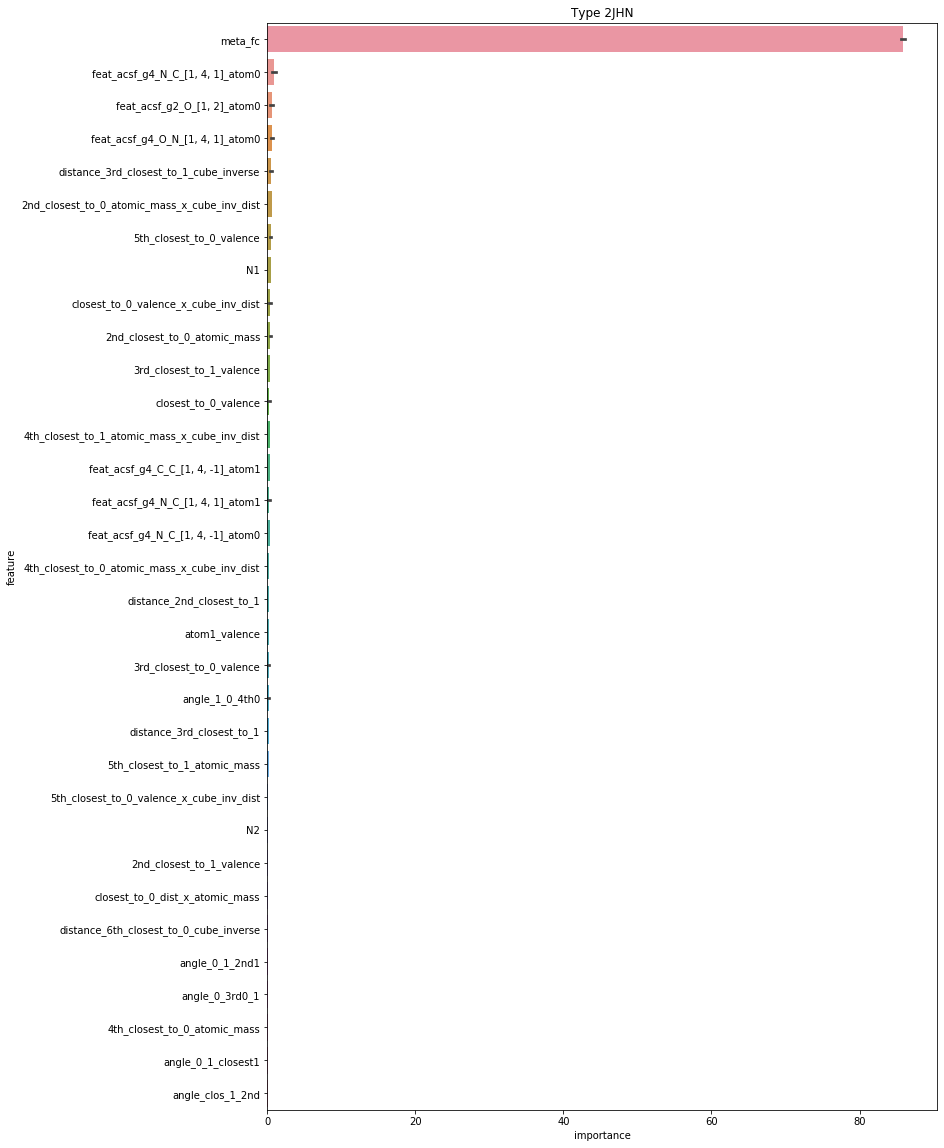

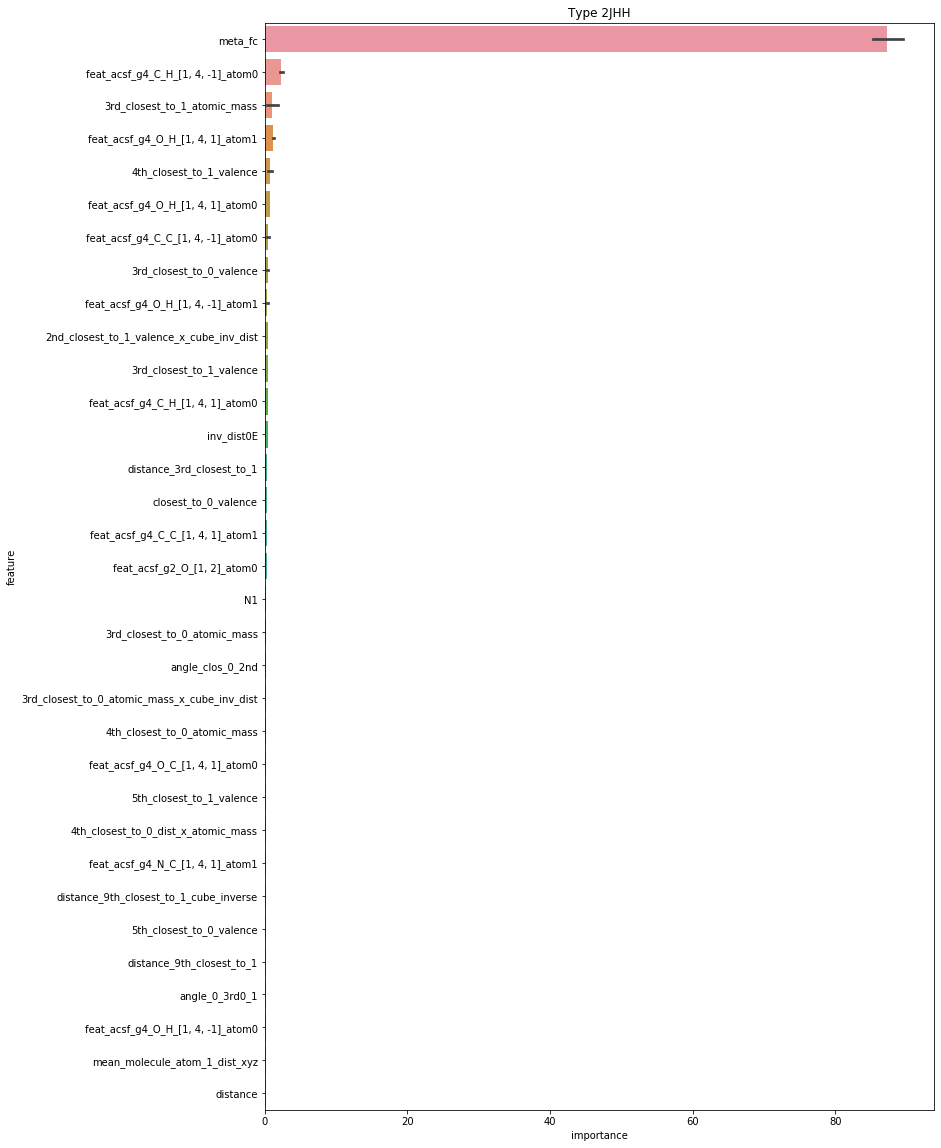

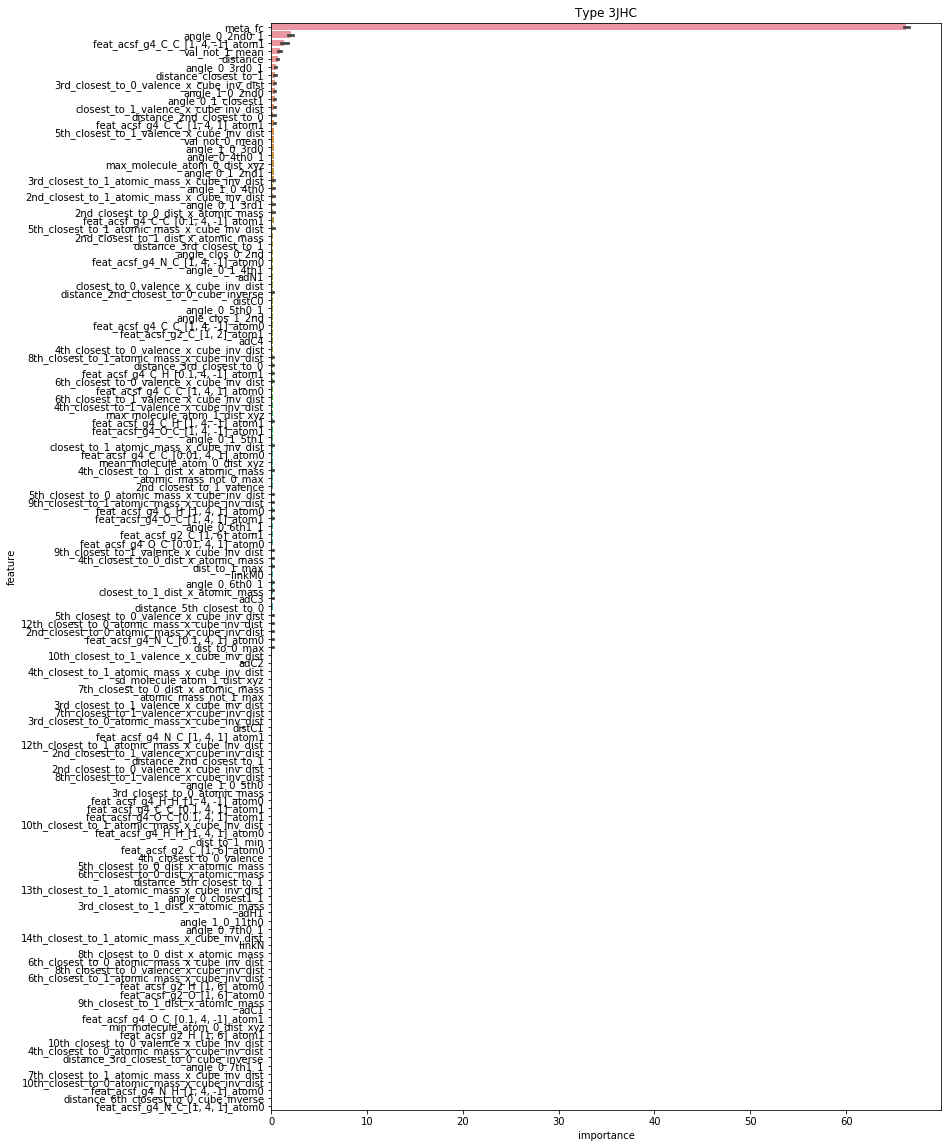

<Figure size 864x1440 with 0 Axes>

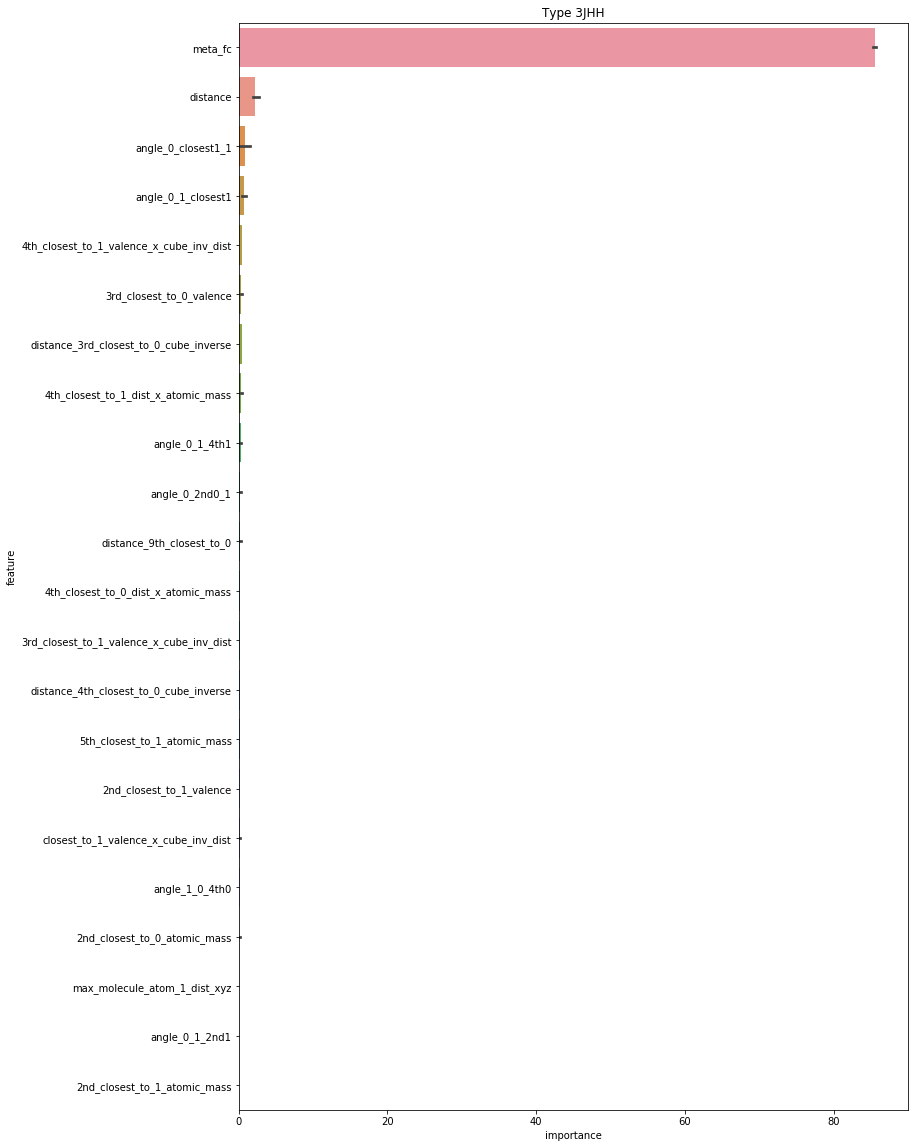

In [25]:
for t in types:
    fi_t = fi.loc[fi['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.1]
    plt.figure(figsize=(12, 20))
    try:
        sns.barplot(x='importance',
                    y='feature',
                    data=fi_t.sort_values('importance',
                                        ascending=False))
        plt.title(f'Type {t}')
        plt.show()
    except:
        pass
